In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [66]:
u1 = [-i/10 for i in range(0, 10)] + [-i for i in range(1, 5)] + [i for i in range(5, 31, 5)]
print(u1)
u2 = [-i/10 for i in range(5, 22, 2)] + [-i/10 for i in range(25, 46, 5)] + [i for i in range(5, 31, 5)]
print(u2)
u3 = [-i/10 for i in range(10, 35, 3)] + [-i/10 for i in range(40, 51, 5)] + [i for i in range(5, 31, 5)]
print(u3)
i1 = [i*1e-9 for i in [15, 6.6, 2.2, 0.3, -0.2, -0.4, -0.5, -0.5, -0.5, -0.5, -0.5, -0.6, -0.6, -0.6, -0.6]] + [i*1e-7 for i in [14, 17, 18.2, 19.4, 19.7]]
print(len(u1), len(i1))
i2 = [i*1e-9 for i in [5.4, 0.7, -0.9, -1.6, -1.8, -1.9, -2, -2, -2, -2.1, -2.1, -2.1, -2.2, -2.2]] + [i*1e-7 for i in [11.8, 15, 16.4, 17, 17.7, 18]]
print(len(u2), len(i2))
i3 = [i*1e-9 for i in [18, 9, 2.7, -1.3, -3.6, -4.8, -5.1, -5.4, -5.4, -5.5, -5.6, -5.6]] + [i*1e-7 for i in [19.3, 27.4, 31, 33.6, 35.4, 37]]
print(len(u3), len(i3))
u_y1 = [-i/10 for i in range(0, 10)] + [-i for i in range(1, 5)] + [i for i in range(5, 31, 5)]
i_y1 = [i*1e-9 for i in [5, 2.1, 0.7, 0, -0.1] + [-0.2 for i in range(9)]] + [i*1e-7 for i in [4.2, 5.1, 5.5, 5.8, 6.1, 6.2]]
print(len(u_y1), len(i_y1))
u_y2 = [i for i in range(5, 31, 5)]
i_y2 = [i*1e-7 for i in [7, 9.4, 10.5, 11.2, 11.9, 12.3]]
print(len(u_y2), len(i_y2))

[0.0, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9, -1, -2, -3, -4, 5, 10, 15, 20, 25, 30]
[-0.5, -0.7, -0.9, -1.1, -1.3, -1.5, -1.7, -1.9, -2.1, -2.5, -3.0, -3.5, -4.0, -4.5, 5, 10, 15, 20, 25, 30]
[-1.0, -1.3, -1.6, -1.9, -2.2, -2.5, -2.8, -3.1, -3.4, -4.0, -4.5, -5.0, 5, 10, 15, 20, 25, 30]
20 20
20 20
18 18
20 20
6 6


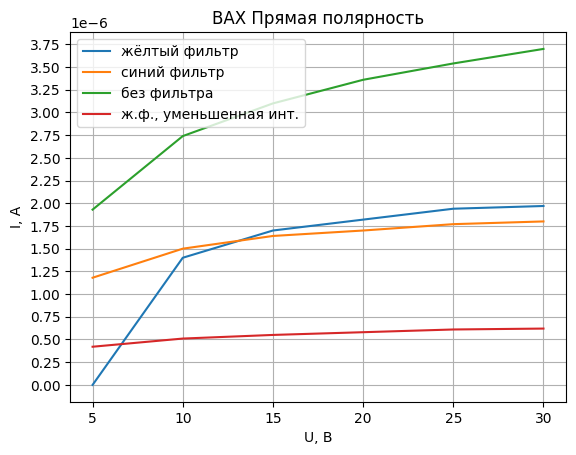

Text(0.5, 1.0, 'ВАХ обратная полярность')

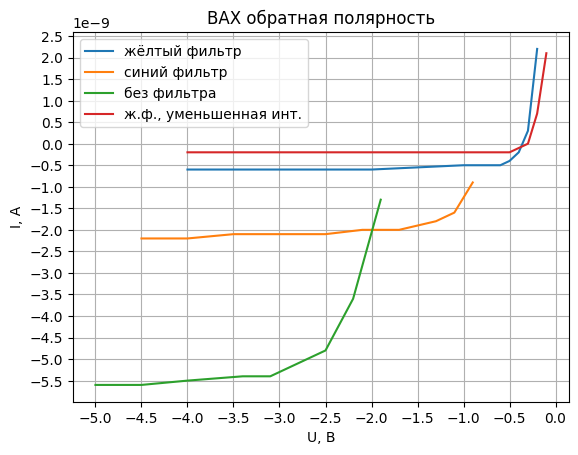

In [68]:
n_p = 6
plt.plot(u1[-n_p:], i1[-n_p:], label='жёлтый фильтр')
plt.plot(u2[-n_p:], i2[-n_p:], label='синий фильтр')
plt.plot(u3[-n_p:], i3[-n_p:], label='без фильтра')
plt.plot(u_y1[-n_p:], i_y1[-n_p:], label='ж.ф., уменьшенная инт.')
plt.legend()
plt.xlabel("U, В")  
plt.ylabel("I, А")
plt.grid(True)
#plt.locator_params(axis='x', nbins=15) 
plt.locator_params(axis='y', nbins=20)
plt.title('ВАХ Прямая полярность')
plt.show()

plt.plot(u1[2:-n_p], i1[2:-n_p], label='жёлтый фильтр')
plt.plot(u2[2:-n_p], i2[2:-n_p], label='синий фильтр')
plt.plot(u3[3:-n_p], i3[3:-n_p], label='без фильтра')
plt.plot(u_y1[1:-n_p], i_y1[1:-n_p], label='ж.ф., уменьшенная инт.')
plt.legend()
plt.xlabel("U, В")  
plt.ylabel("I, А")
plt.grid(True)
plt.locator_params(axis='y', nbins=20)
plt.locator_params(axis='x', nbins=20) 
plt.title('ВАХ обратная полярность')

[-6.41725549e-01  2.86537746e-15]


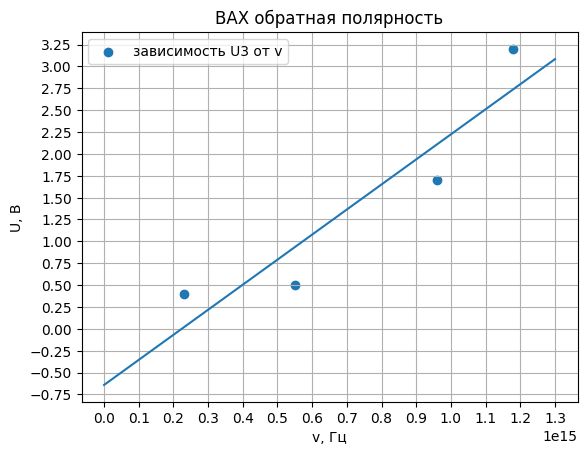

In [71]:
u_z1 = -0.5
u_z2 = -1.7
u_z3 = -3.2
u_z4 = -0.4
u_z = np.array([u_z1, u_z2, u_z3, u_z4]) * -1
v1 = 5.5*1e14
v2 = 9.6*1e14
v3 = 11.8*1e14
v4 = 2.3*1e14
v = np.array([v1, v2, v3, v4])

plt.scatter(v, u_z, label='зависимость U3 от v')

plt.legend()
plt.ylabel("U, В")  
plt.xlabel("v, Гц")
plt.grid(True)
plt.locator_params(axis='y', nbins=20)
plt.locator_params(axis='x', nbins=20) 
plt.title('ВАХ обратная полярность')

f = np.stack((np.ones_like(v), v)).T
w = np.linalg.inv(f.T@f) @ f.T@u_z
x = np.linspace(0, 1.3*1e15, 50)
print(w)
y = [w@np.array([1, x_i]) for x_i in x]
plt.plot(x, y)
plt.show()

In [75]:
e = 1.6*1e-19
h = e * w[1]
print("h =", h)
A = w@np.array([1, 0]) * -1
print("A =", A)
print("v_кр =", A/h)


h = 4.58460394198587e-34
A = 0.6417255485310546
v_кр = 1.39974042829332e+33
